Calculate number of sigma for shifts in $\Omega_m$ and $\sigma_8$ using Gaussian approximation or parameter differences with KDE 

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
from stats import *
from gaussian_approximation import generate_samples, get_pte_from_gaussian
from getdist import plots, MCSamples
from matplotlib import pyplot as plt
from scipy.stats import norm, multivariate_normal
from anesthetic import MCMCSamples

from diff_chain import *
from kde_method import *
import time

Load chains and shifts

In [2]:
PATH_TO_SIMS_MEAN_VAR = '/Users/Pablo/Projets/Tension/sims_mean_var/'
PATH_TO_CHAINS = '../chains/'

In [3]:
# Path to the chains
path_DES = PATH_TO_CHAINS+'chains_poly/0.01_tolerance/d_noiseless/d_TTlite_noiseless_poly'
path_planck = PATH_TO_CHAINS+'chains_poly/0.01_tolerance/planck_poly0.01/planck'

# Load points
means_planck = np.loadtxt(PATH_TO_SIMS_MEAN_VAR+'baseline/cosmological_parameters/values.txt', usecols = [2], unpack=True)[[17,3,13,10,0]]

x05_om = np.loadtxt(PATH_TO_SIMS_MEAN_VAR+'om_05sigma/cosmological_parameters/values.txt', usecols = [2], unpack=True)[[17,3,13,10,0]]
x1_om = np.loadtxt(PATH_TO_SIMS_MEAN_VAR+'om_1sigma/cosmological_parameters/values.txt', usecols = [2], unpack=True)[[17,3,13,10,0]]
x15_om = np.loadtxt(PATH_TO_SIMS_MEAN_VAR+'om_15sigma/cosmological_parameters/values.txt', usecols = [2], unpack=True)[[17,3,13,10,0]]
x2_om = np.loadtxt(PATH_TO_SIMS_MEAN_VAR+'om_2sigma/cosmological_parameters/values.txt', usecols = [2], unpack=True)[[17,3,13,10,0]]
x3_om = np.loadtxt(PATH_TO_SIMS_MEAN_VAR+'om_3sigma/cosmological_parameters/values.txt', usecols = [2], unpack=True)[[17,3,13,10,0]]
x5_om = np.loadtxt(PATH_TO_SIMS_MEAN_VAR+'om_5sigma/cosmological_parameters/values.txt', usecols = [2], unpack=True)[[17,3,13,10,0]]

x05_s8 = np.loadtxt(PATH_TO_SIMS_MEAN_VAR+'s8_05sigma/cosmological_parameters/values.txt', usecols = [2], unpack=True)[[17,3,13,10,0]]
x1_s8 = np.loadtxt(PATH_TO_SIMS_MEAN_VAR+'s8_1sigma/cosmological_parameters/values.txt', usecols = [2], unpack=True)[[17,3,13,10,0]]
x15_s8 = np.loadtxt(PATH_TO_SIMS_MEAN_VAR+'s8_15sigma/cosmological_parameters/values.txt', usecols = [2], unpack=True)[[17,3,13,10,0]]
x2_s8 = np.loadtxt(PATH_TO_SIMS_MEAN_VAR+'s8_2sigma/cosmological_parameters/values.txt', usecols = [2], unpack=True)[[17,3,13,10,0]]
x3_s8 = np.loadtxt(PATH_TO_SIMS_MEAN_VAR+'s8_3sigma/cosmological_parameters/values.txt', usecols = [2], unpack=True)[[17,3,13,10,0]]
x5_s8 = np.loadtxt(PATH_TO_SIMS_MEAN_VAR+'s8_5sigma/cosmological_parameters/values.txt', usecols = [2], unpack=True)[[17,3,13,10,0]]

x05_om -= means_planck
x1_om -= means_planck
x15_om -= means_planck
x2_om -= means_planck
x3_om -= means_planck
x5_om -= means_planck

x05_s8 -= means_planck
x1_s8 -= means_planck
x15_s8 -= means_planck
x2_s8 -= means_planck
x3_s8 -= means_planck
x5_s8 -= means_planck

x05_om[4] *= 1e9
x1_om[4] *= 1e9
x15_om[4] *= 1e9
x2_om[4] *= 1e9
x3_om[4] *= 1e9
x5_om[4] *= 1e9

x05_s8[4] *= 1e9
x1_s8[4] *= 1e9
x15_s8[4] *= 1e9
x2_s8[4] *= 1e9
x3_s8[4] *= 1e9
x5_s8[4] *= 1e9

shifts = [x05_om, x1_om, x15_om, x2_om, x3_om, x5_om, 
x05_s8, x1_s8, x15_s8, x2_s8, x3_s8, x5_s8]

shiftnames = ['x05_om', 'x1_om', 'x15_om', 'x2_om', 'x3_om', 'x5_om', 
'x05_s8', 'x1_s8', 'x15_s8', 'x2_s8', 'x3_s8', 'x5_s8']

# Gaussian Approximation

In [4]:
c_des = np.loadtxt('/Users/Pablo/Projets/Tension/chains/chains_poly/0.01_tolerance/d_noiseless/covmat.txt') 
c_planck = np.loadtxt('/Users/Pablo/Projets/Tension/chains/chains_poly/0.01_tolerance/planck_poly0.01/covmat.txt') 

c_des = c_des[:5,:5]
c_des[4] = c_des[4]*1e9
c_des[:,4] = c_des[:,4]*1e9
c_planck = c_planck[:5,:5]   
c_planck[4] = c_planck[4]*1e9
c_planck[:,4] = c_planck[:,4]*1e9

mean = np.zeros(5)
cov = c_des+c_planck

nsamples_gaussian = int(1e7)

In [6]:
print('Gaussian Approximation')
print('----------------------')
for i in range(len(shifts)):
    x0 = shifts[i]
    y, loglike_samples = generate_samples(mean, cov, nsamples_gaussian)
    loglike_x = multivariate_normal.logpdf(x0, mean=mean, cov=cov) 
    pte = get_pte_from_samples(x0, loglike_x, loglike_samples)
    nsigma = get_nsigma(pte)

    print(shiftnames[i], pte, nsigma)

Gaussian Approximation
----------------------
x05_om 0.9276712 0.09077522039911601
x1_om 0.33296630000000005 0.968156331857927
x15_om 0.019669599999999954 2.3325914140898045
x2_om 0.0001491000000000131 3.7925636782106746
x3_om 0.0 inf
x5_om 0.0 inf
x05_s8 0.9797996 0.025320152140166304
x1_s8 0.7085569 0.37379491898739897
x15_s8 0.2639424 1.1171214506099465
x2_s8 0.04779909999999998 1.9791501815161474
x3_s8 0.0002227000000000201 3.6917686448995077
x5_s8 0.0 inf


Save as GetDist samples for plotting

In [7]:
nsamples_plot = int(1e5)
y, _ = generate_samples(mean, cov, nsamples_plot)

names = ['omegam', 'h0', 'omegab', 'ns', 'as']
labels = ['\Delta \Omega_m', '\Delta H0', '\Delta \Omega_m', '\Delta n_s', '\Delta A_s']
samples_gauss = MCSamples(samples=y, names = names, labels = labels)

Removed no burn in


# KDE

In [8]:
# Number of samples for fitting
nsamples_diff = 10000
# Number of samples for PTE calculation
nsamples = 200000

print('Starting')
time0 = time.time()
# Generate difference chains
diff_weights, diff_loglike, diff_samples = generate_difference_chain(
    path_DES, path_planck)
diff_samples[:,4] *= 1e9
time1 = time.time()
print('Difference chain generated, time: ', time1-time0, 'seconds')

weights, loglike, samples = select_samples(diff_weights, diff_loglike, 
    diff_samples, nsamples_diff)

kde = fit_kde(samples, weights)
time2 = time.time()
print('KDE fitted, time: ', time2-time1, 'seconds')

weights, loglike, samples = select_samples(diff_weights, diff_loglike, 
    diff_samples, nsamples)

loglike_kde = get_kde_loglike(samples, kde)
time3 = time.time()
print('KDE loglike calculated, time: ', time3-time2, 'seconds')

for i in range(len(shifts)):
    x0 = shifts[i]
    loglike_x = get_kde_loglike(x0, kde)

    pte = get_pte_from_samples(x0, loglike_x, loglike_kde, weights = weights)
    nsigma = get_nsigma(pte)

    print(shiftnames[i], pte, nsigma)

print('Total time: ', time3 - time0, 'seconds')


Starting
Difference chain generated, time:  59.67744588851929 seconds
KDE fitted, time:  0.04314112663269043 seconds
KDE loglike calculated, time:  765.7707321643829 seconds
x05_om 0.7004077266072928 0.38477013636530794
x1_om 0.11798327065786851 1.5632948007739251
x15_om 0.0044919138596061225 2.841377265146353
x2_om 5.745885888819302e-05 4.023010806816664
x3_om 2.5202062658991053e-14 7.620844895928565
x5_om 2.4868995751603507e-14 7.622561816573917
x05_s8 0.9013843003529226 0.1239128224450836
x1_s8 0.29389857590616175 1.0496075685113686
x15_s8 0.03850756790366772 2.0694106507104526
x2_s8 0.0026000626389037773 3.0114464441475226
x3_s8 1.0687950413590386e-07 5.314621066180505
x5_s8 3.11972669919669e-14 7.593252958490688
Total time:  825.4913191795349 seconds


In [9]:
gd_samples2 = MCSamples(samples=samples, names = names, labels = labels, weights = weights, 
                       settings={'smooth_scale_1D':0.35, 'smooth_scale_2D':0.4})

Removed no burn in


Save, and load as Anesthetic class (you need to create a directory called 'plotchains'

In [10]:
samples_gauss.saveAsText('plotchains/gauss')
gd_samples2.saveAsText('plotchains/diff')

g = MCMCSamples(root = 'plotchains/gauss')
d = MCMCSamples(root = 'plotchains/diff')

In [11]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 15
rcParams['font.size'] = 20

IndexError: list index out of range

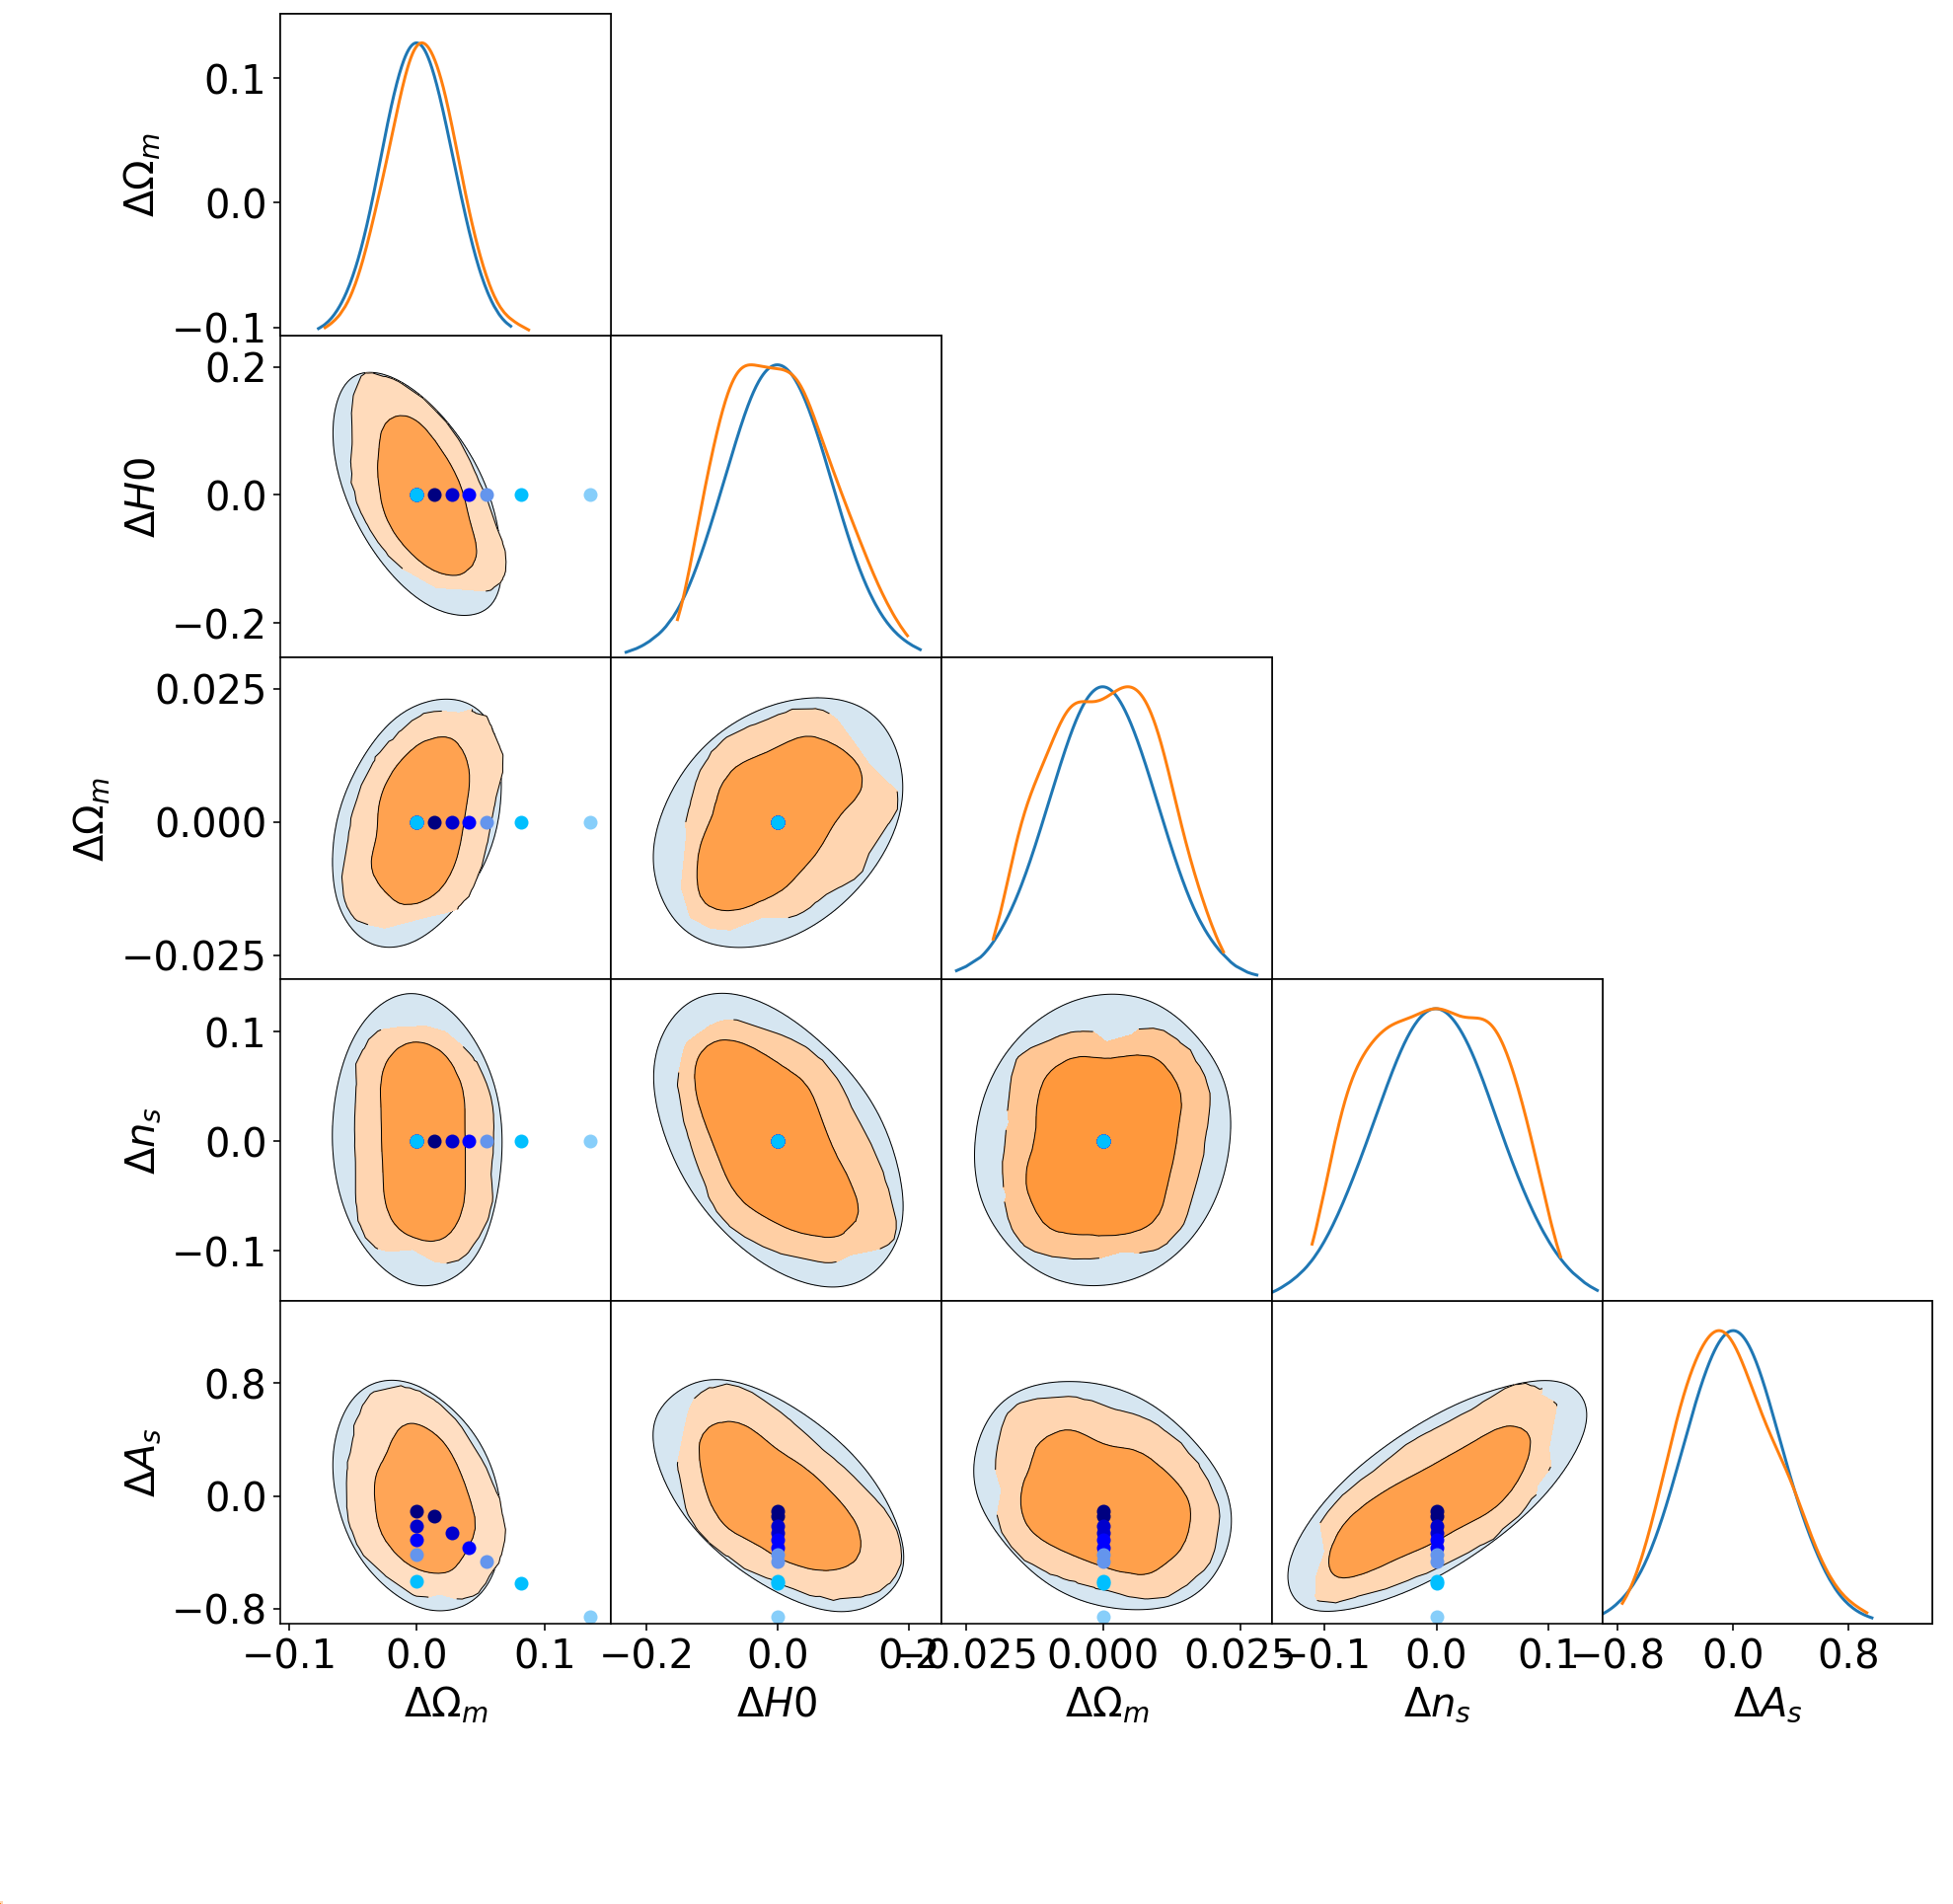

In [12]:
names = ['omegam', 'h0', 'omegab', 'ns', 'as']
colors = ['navy', 'mediumblue', 'blue', 'cornflowerblue', 'deepskyblue', 'lightskyblue']
labelnames = ['$0.5 \sigma$ shift', '$1 \sigma$ shift', '$1.5 \sigma$ shift', '$2 \sigma$ shift', '$3 \sigma$ shift', '$5 \sigma$ shift']
colors += colors
labelnames += labels
fig, axes = g.plot_2d(names, types={'lower':'fastkde','diagonal':'kde'}, label = 'Gaussian Approximation');
d.plot_2d(axes=axes, label = 'Parameter Differences');
for i in range(len(shifts)):
    for ii in range(len(names)):
        for jj in range(len(names)):
            if jj > ii:
                axes[names[ii]][names[jj]].scatter(shifts[i][ii], shifts[i][jj], color = colors[i], label = labelnames[i])
            if i==5: 
                handles, labels = axes['omegam']['h0'].get_legend_handles_labels()

leg = fig.legend(handles, labels)
#fig.savefig('/Users/Pablo/Projets/Tension/shifts.pdf')